##Neural Newtwork classification in Tensorflow

Classification is where you try to classify something as one thing or another.
 A few typs of classification problems:
 * Binary classification
 * Multi classification
 * Multilabel CLassification

## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 exapmles
n_samples = 1000

# Create cricles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)


In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now .... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({
    "X0": X[:,0],
    "X1": X[:,1],
    "label": y
})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


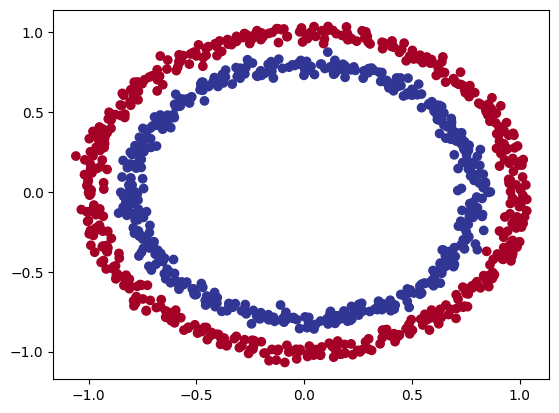

In [ ]:
# Visulaoze with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

##Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in  modelling

In [ ]:
import tensorflow as tf


In [ ]:
#set random seed
tf.random.set_seed(42)

# 1. Create the model using sequential api

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. fit the model
model.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.0265 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.8160 - accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 7.0016 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


In [ ]:
# Let's train for longer
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step up a notch and add an extra layer

In [ ]:
# set random set
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. fit the model
model_2.fit(X,y,epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 7ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

##Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compile a model - here we might to choose a different optimization function as Adam instead of SGD.
3. Fitting a model - more epochs

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X,y,epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5100


[0.6975714564323425, 0.5099999904632568]

In [ ]:
# model_3.predict(X)



In [ ]:
model_3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               300       
                                                                 
 dense_61 (Dense)            (None, 10)                1010      
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions accross the meshgrid
* Plot the predications as well as a line between zones (where each unique class falls.)

In [ ]:
import numpy as np


In [ ]:

def plot_decision_boundary(model, X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1
  
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value (we're going to make predictions on those)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together 
  print(xx.shape)
  print(xx.ravel().shape)
  print(x_in.shape)
  #Make predictions
  y_pred = model.predict(x_in)
  print(y_pred.shape)
  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    
  else:
    print("doing binary classification")

    y_pred = np.round(y_pred).reshape(xx.shape)
    # print(y_pred)

    # Plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification


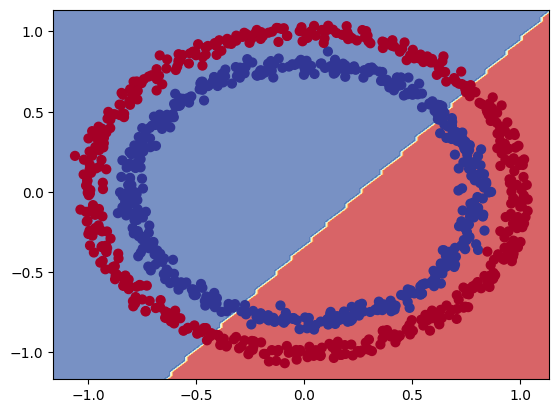

In [ ]:
# Cheack out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)


In [ ]:
# # Let's see if our model can be used for regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression  = tf.range(100,1100,5) # y= X + 100

# SPlit our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# # fit our model to regression data
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train, epochs=100)
# # Error
# #Input 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)

we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data

In [ ]:
# Setup random seet
tf.random.set_seed(42)

# 1.create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 420.3428 - mae: 420.3428
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 307.4930 - mae: 307.4930
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 196.9646 - mae: 196.9646
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 81.0052 - mae: 81.0052
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 66.0310 - mae: 66.0310
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 91.3086 - mae: 91.3086
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 66.4415 - mae: 66.4415
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7463 - mae: 43.7463
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.4724 - mae: 49.4724
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6551 - mae: 41.6551
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


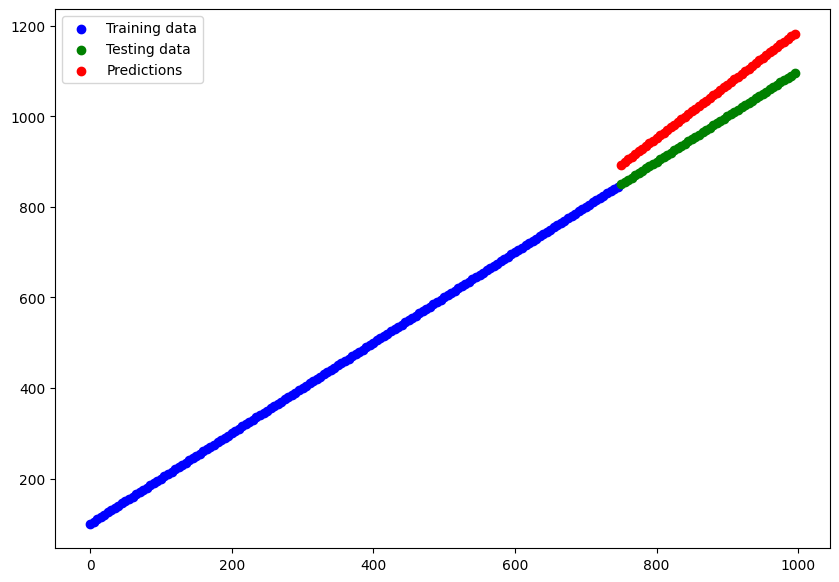

In [ ]:
# Make predictions with our training model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

##The missing pieace : Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_4.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0493 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0359 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9961 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9693 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9289 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9219 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9029 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8862 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8853 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8846 - accuracy: 0.4880
Epoch 11/

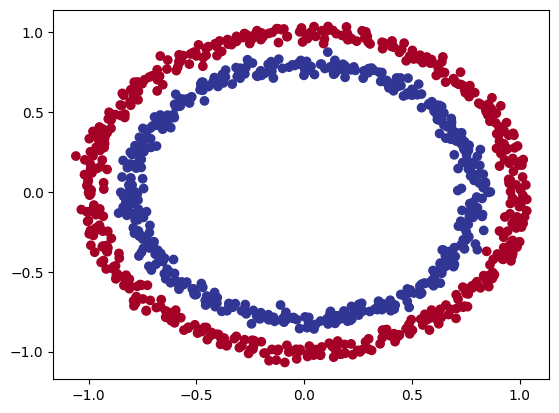

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification


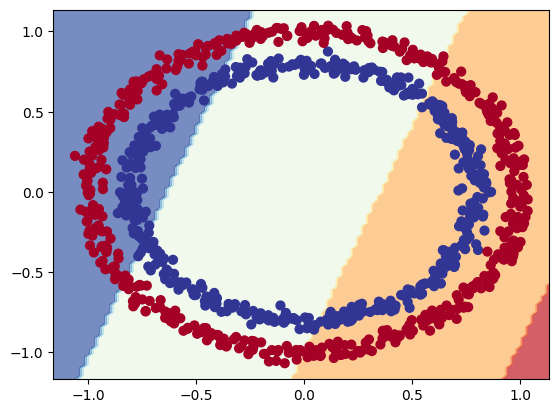

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model=model_4,
    X=X,
    y=y
)

Let's try build our first neural network with non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1128 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0806 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0465 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0144 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0098 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0086 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0078 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0069 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0061 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0051 - accuracy: 0.4810
Epoch 11/

In [ ]:
# TIme to replicate multilayer neural network from tensorflow playground
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 1.0282 - accuracy: 0.4310
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.4050
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8362 - accuracy: 0.4110
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.4010
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.3440
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7616 - accuracy: 0.3240
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.3130
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.3190
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.3260
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.3370
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9710


[0.0646495595574379, 0.9710000157356262]

(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification


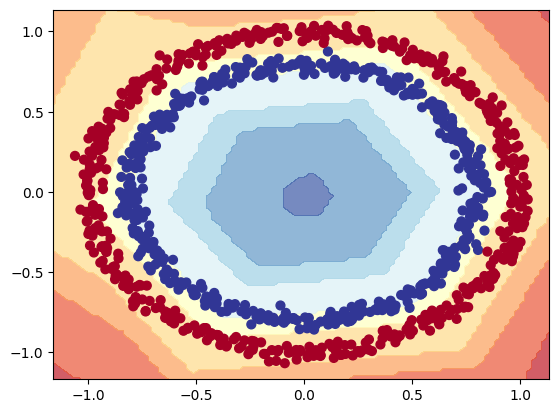

In [ ]:
# How do our model prediction looks

plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# 2. compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5100
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5230
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5220
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5240
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8470


[0.46526071429252625, 0.847000002861023]

(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification


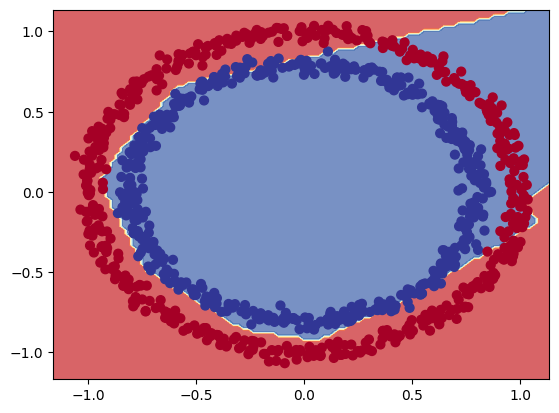

In [ ]:
# Visualize
plot_decision_boundary(model_7,X,y)

❓What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on ?

**Note** : The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

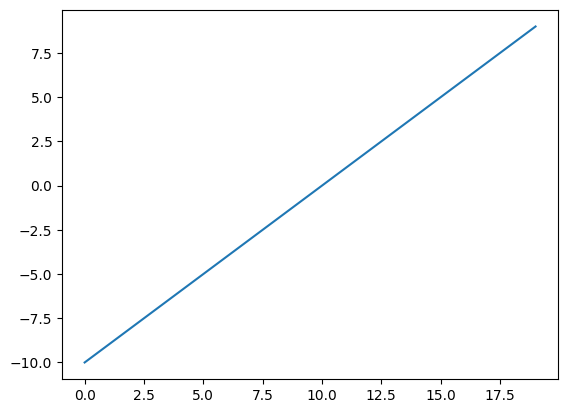

In [ ]:
# Visualize our toy tensor
plt.plot(A); 

In [ ]:
# sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# using sigmoid on our tensor
sigmoid(A)  

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [ ]:
# relu function 
def relu(x):
  return tf.maximum(0,x)

# our tensor to relu function
relu(A)  

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

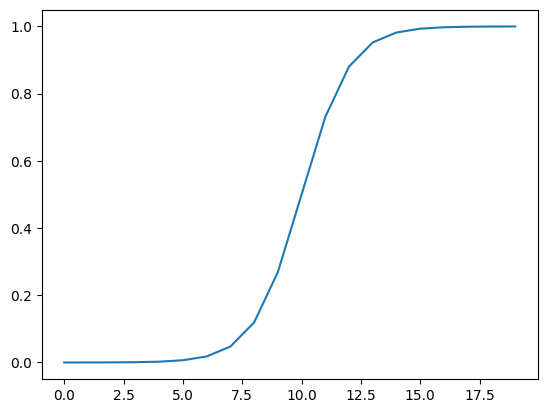

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

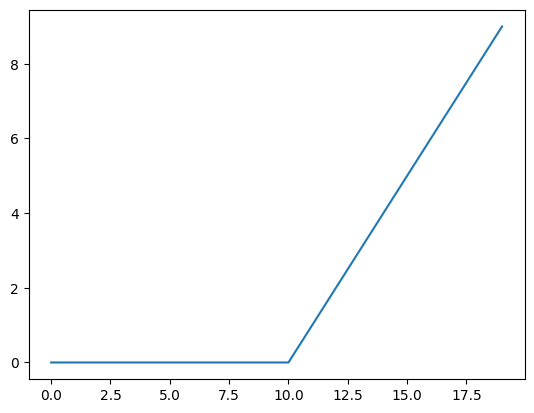

In [ ]:
# Plot relu modified function
plt.plot(relu(A))

In [ ]:
# Linear acitvation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

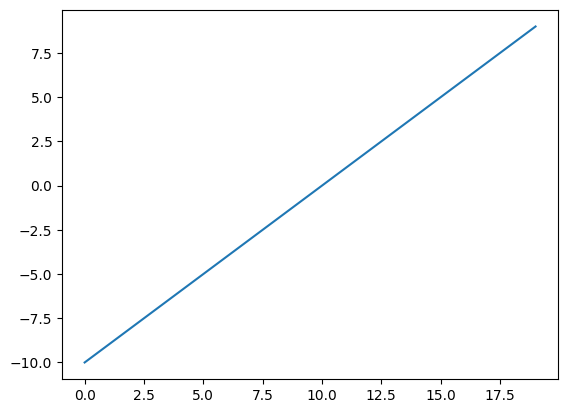

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So, let's create a training and test set


In [ ]:
# Check how many eg we have
len(X)

1000

In [ ]:
# Split into train and test set using indexing

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

#set random seed
tf.random.set_seed(42)

# 1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. complie the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

# 3. fit the model
history = model_8.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.4963
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4938
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4963
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4787
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4837
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4825
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4888
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4913
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.9850


[0.3725387156009674, 0.9850000143051147]

(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification
(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 0s 1ms/step
(10000, 1)
doing binary classification


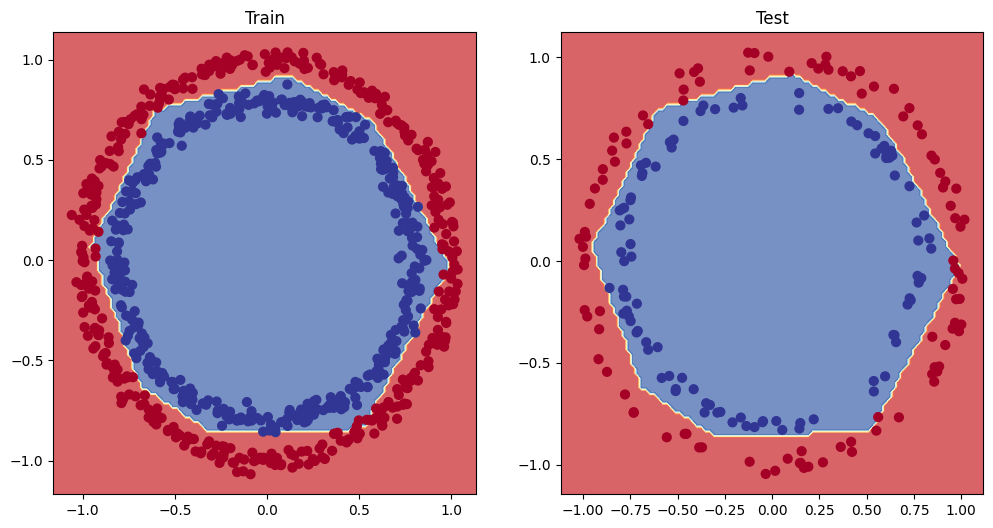

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

##Plot the loss (or training) curves


In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.700346,0.49625
1,0.699029,0.50875
2,0.698169,0.49625
3,0.697405,0.49375
4,0.696881,0.49625
...,...,...
95,0.398530,0.98625
96,0.392999,0.98750
97,0.385752,0.98750
98,0.379655,0.98500


Text(0.5, 1.0, 'Model_8 loss curves')

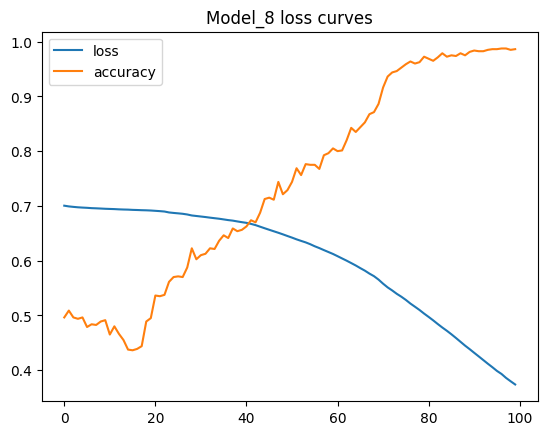

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


🔑 **Note :** For many problem, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

In [ ]:
model.evaluate(X_test,y_test), model_2.evaluate(X_test,y_test), model_4.evaluate(X_test,y_test), model_5.evaluate(X_test,y_test), model_6.evaluate(X_test,y_test), model_7.evaluate(X_test,y_test), model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.9850


([7.635349273681641, 0.5049999952316284],
 [7.700866222381592, 0.4950000047683716],
 [4.407832622528076, 0.5149999856948853],
 [5.448517322540283, 0.4699999988079071],
 [0.06287585943937302, 0.9649999737739563],
 [0.47249892354011536, 0.8299999833106995],
 [0.3725387156009674, 0.9850000143051147])

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra pieace of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5063 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

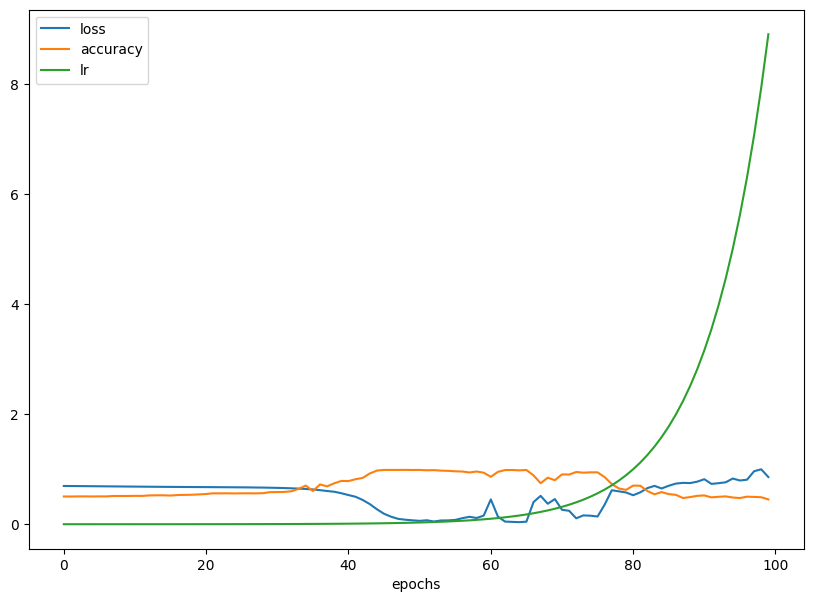

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate v/s Loss')

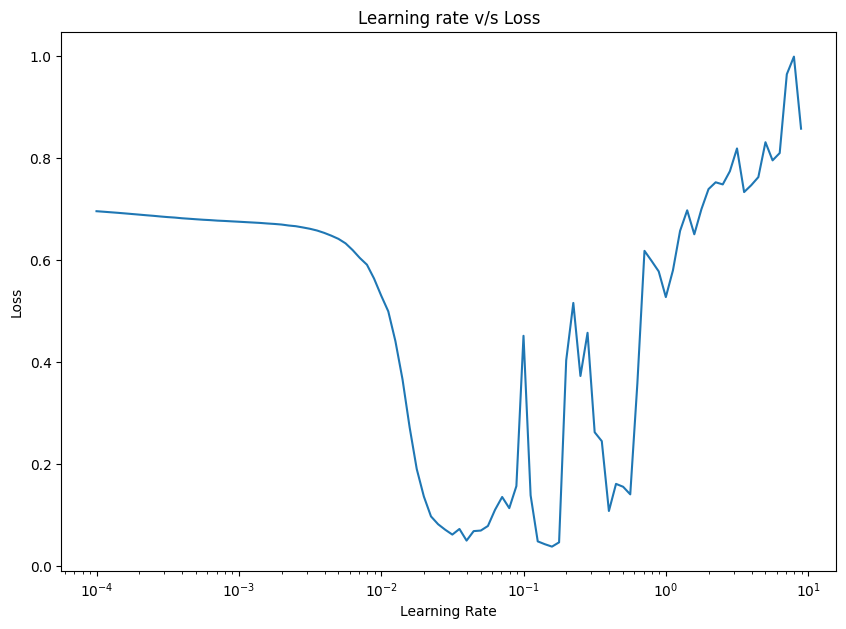

In [ ]:
# Plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s Loss")

In [ ]:
# Example of typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
0.003, 0.0025

(0.003, 0.0025)

In [ ]:
# Let's try using higher ideal learning rate with the same model

# set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model with the ideal learning rate
model_10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.02),
    metrics=["accuracy"]
)

# fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7043 - accuracy: 0.5025
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4725
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4725
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4850
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4625
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4575
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4725
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4762
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4638
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)


7/7 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5250


[0.6928168535232544, 0.5249999761581421]

In [ ]:
# Evaluate model 8 on the dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.9850


[0.3725387156009674, 0.9850000143051147]

(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 1s 3ms/step
(10000, 1)
doing binary classification
(100, 100)
(10000,)
(10000, 2)
313/313 [==============================] - 1s 4ms/step
(10000, 1)
doing binary classification


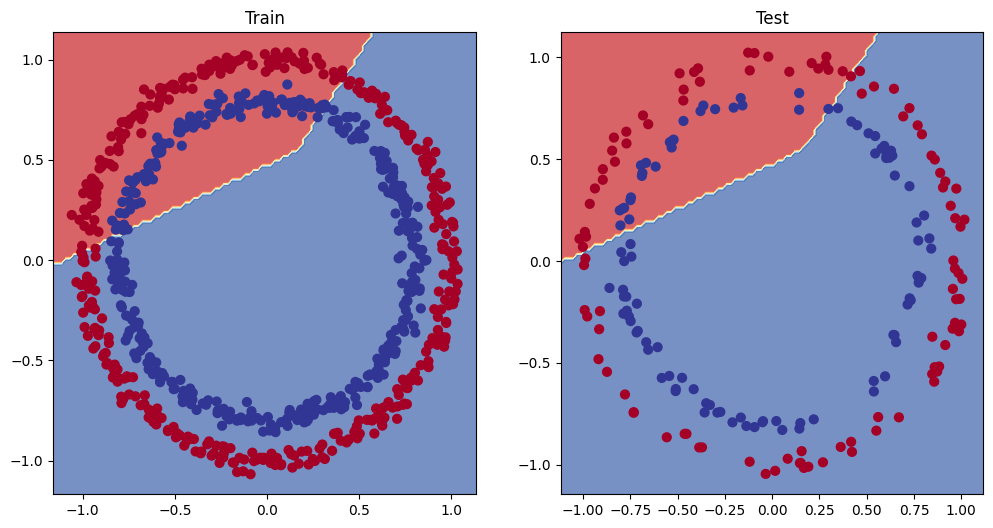

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

##Classification evaluation matrix methods

`tp`: True positive

`tn`: True Negative

`fp`: false positive

`fn`: false negative

**Metric name** : `Accuracy` - Default metric for classification problems. Not the best for imbalanced classes.

`Precision` - Higher precision leads to less false positive.

`Recall` - higher recall leads to less false negative

`F1-score` - Combination of precision and recall usually a good overall metric for a classification model.

`Confusion matrix` - When comparing predictions to truth labels to see where models gets confused. Can be hard to use with large numbers of classes.


## More classification evaluation methods
Alongside visualizing our model results as such as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
*Classification report(from scikit-learn)

In [ ]:
# CHeck the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5250
Model loss on the test set: 0.6928168535232544
Model accuracy on the test set: 52.50%


Confusion matrix

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.50136507],
       [0.50136507],
       [0.50136495],
       [0.50136507],
       [0.50101227],
       [0.49968147],
       [0.49863806],
       [0.49708626],
       [0.50136507],
       [0.50136507]], dtype=float32)

looks like our predictions array has come out in **prediction probability** form... standard output from the sigmoid(or softmax) activation functions.

In [ ]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[32, 69],
       [26, 73]])

How about we prettify our confusion matrix?

📔**Note**: the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion function

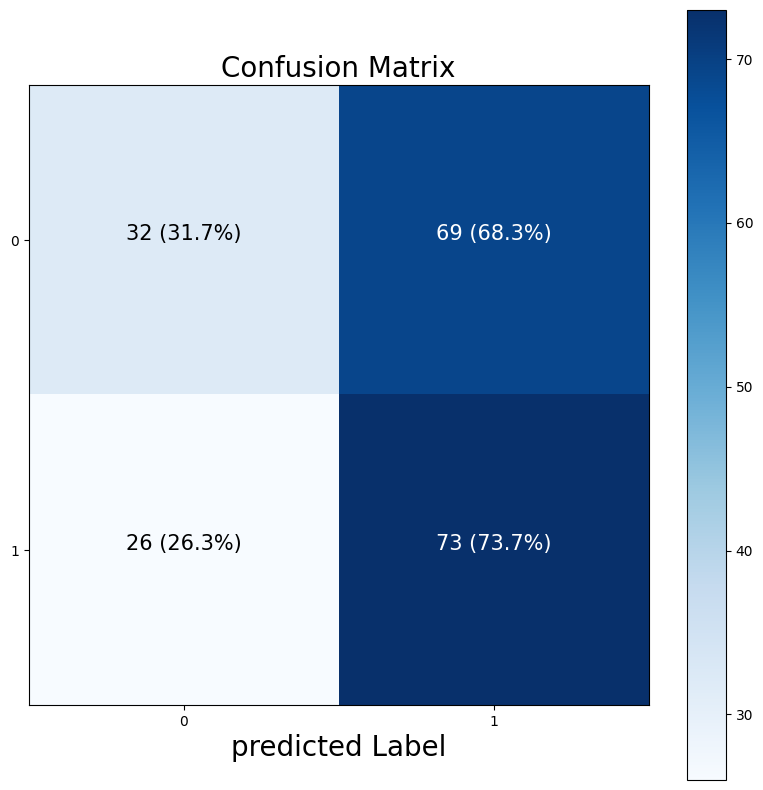

In [ ]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="predicted Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15) 

In [ ]:
cm

array([[32, 69],
       [26, 73]])

In [ ]:
cm.sum(axis=1)[:,np.newaxis]

array([[101],
       [ 99]])

<Axes: >

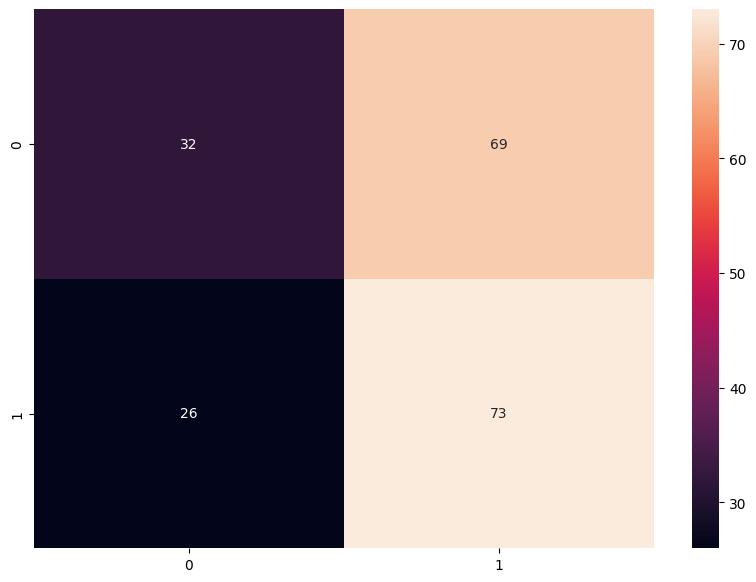

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(y_test, tf.round(y_preds))

cm_norm = array.astype("float") / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(array, index = np.arange(array.shape[0]),
                  columns = np.arange(array.shape[0]))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

##Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")
print(len(train_data),len(train_labels))

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

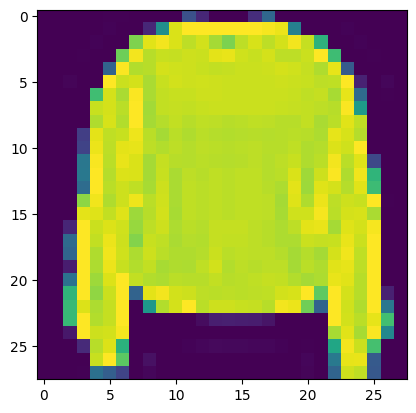

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a samll list so we can index onto our training labels so they're human readable
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Text(0.5, 1.0, 'Coat')

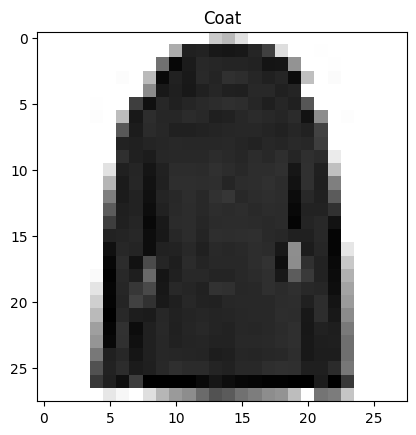

In [ ]:
# Plot example image and it's label
plt.imshow(train_data[2000], cmap=plt.cm.binary)
plt.title(class_names[train_labels[2000]])

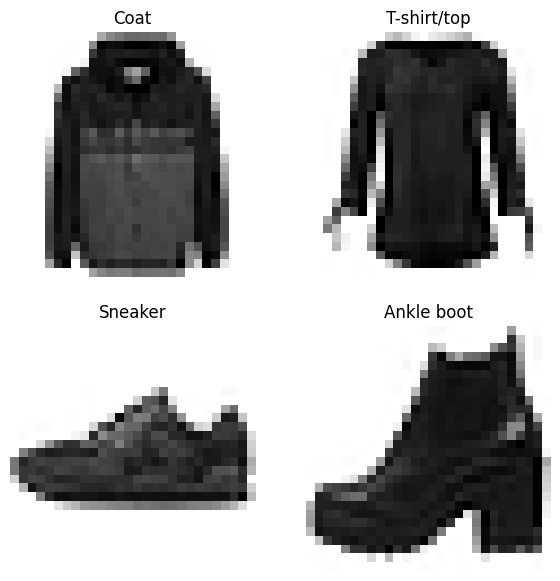

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 X 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy.
* Output layer activation = softmax (not sigmoid)

In [ ]:
# Our data needs to be flattened (from 28 x 28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# # Set random seed
# tf.random.set_seed(42)

# # create the model
# model_11 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax"),
# ])

# # compile the model
# model_11.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=["accuracy"]
# )

# # fit the model
# model_norm_history = model_11.fit(train_data,
#                                   train_labels, 
#                                   epochs=100,
#                                   validation_data = (test_data, test_labels))

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# compile the model
model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
non_norm_history = model_11.fit(train_data,
                                  tf.one_hot(train_labels, depth=10), 
                                  epochs=10,
                                  validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 2.9238 - accuracy: 0.0975 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3037 - val_accuracy

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
model_11.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_83 (Dense)            (None, 4)                 3140      
                                                                 
 dense_84 (Dense)            (None, 4)                 20        
                                                                 
 dense_85 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CHeck the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural n/w prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns betwene 0 and 1

In [ ]:
# We can get our training and testing data b/w 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),\
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3386 - accuracy: 0.5410 - val_loss: 1.0218 - val_accuracy: 0.6565
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9349 - accuracy: 0.6799 - val_loss: 0.9065 - val_accuracy: 0.6734
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8429 - accuracy: 0.7030 - val_loss: 0.8365 - val_accuracy: 0.6906
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8023 - accuracy: 0.7124 - val_loss: 0.8094 - val_accuracy: 0.6991
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7828 - accuracy: 0.7176 - val_loss: 0.7932 - val_accuracy: 0.7207
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7686 - accuracy: 0.7210 - val_loss: 0.7898 - val_accuracy: 0.7185
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7596 - accuracy: 0.7250 - val_loss: 0.8128 - val_accuracy:

>🔑**Note :** Neural n/w tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized Data'}>

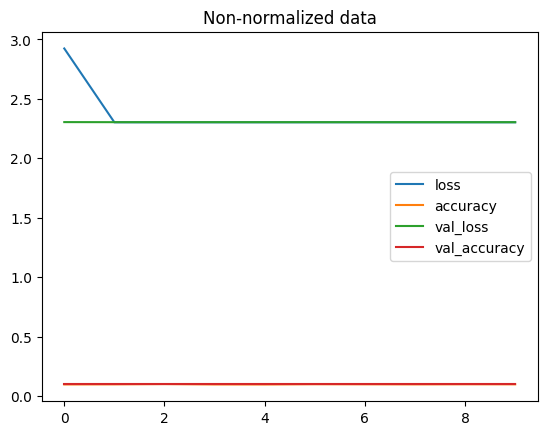

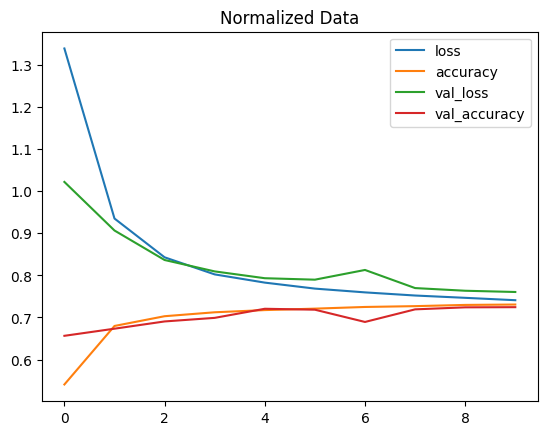

In [ ]:
import pandas as pd

# Plot non_normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

> 🔑 **Note** : The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

##Finding the ideal learning rate


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# COmpile the model 
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data_norm,
             train_labels,
             epochs=40,
             validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0342 - accuracy: 0.6504 - val_loss: 0.7128 - val_accuracy: 0.7654
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6571 - accuracy: 0.7794 - val_loss: 0.6823 - val_accuracy: 0.7756
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6173 - accuracy: 0.7908 - val_loss: 0.6332 - val_accuracy: 0.7846
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5978 - accuracy: 0.7965 - val_loss: 0.6120 - val_accuracy: 0.7942
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5860 - accuracy: 0.7970 - val_loss: 0.6034 - val_accuracy: 0.7959
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5739 - accuracy: 0.8007 - val_loss: 0.6125 - val_accuracy: 0.7937
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5656 - accuracy: 0.8025 - val_loss: 0.6007 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

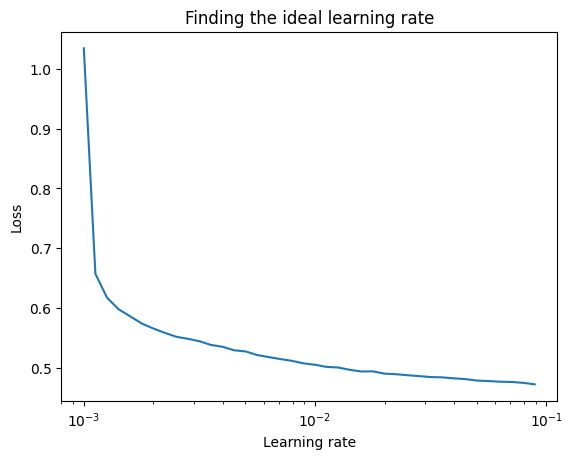

In [ ]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit the model with ideal laerning rate

# set random seed
tf.random.set_seed(42)

# create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# compile the model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=["accuracy"]
)

# fit the model
history_14=model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1198 - accuracy: 0.5968 - val_loss: 0.8341 - val_accuracy: 0.7242
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7117 - accuracy: 0.7586 - val_loss: 0.6851 - val_accuracy: 0.7665
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6114 - accuracy: 0.7915 - val_loss: 0.6151 - val_accuracy: 0.7919
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5591 - accuracy: 0.8089 - val_loss: 0.5757 - val_accuracy: 0.8028
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5353 - accuracy: 0.8146 - val_loss: 0.5623 - val_accuracy: 0.8034
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5194 - accuracy: 0.8182 - val_loss: 0.5577 - val_accuracy: 0.8038
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5102 - accuracy: 0.8217 - val_loss: 0.5527 - val_accuracy:

##Evaluating our multiclass classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix).
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2

In [ ]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size = 15):

  

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="predicted Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size) 

In [ ]:
class_names

['T-shirt/top',
 'Trousers',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
train_data.shape, train_data_norm.shape

((60000, 28, 28), (60000, 28, 28))

In [ ]:
test_data_norm.shape

(10000, 28, 28)

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.63948468e-10, 9.87126776e-14, 7.76774312e-10, 3.63258579e-07,
        3.57636772e-12, 5.69918036e-01, 7.81083198e-09, 8.25527534e-02,
        3.97752505e-04, 3.47131133e-01],
       [1.69244031e-05, 1.49695015e-05, 9.40689206e-01, 1.58569924e-06,
        3.24808247e-02, 6.32013700e-17, 2.66986378e-02, 1.05255434e-29,
        9.77871823e-05, 0.00000000e+00],
       [2.87745297e-06, 9.98748600e-01, 1.37576979e-04, 7.32824672e-04,
        3.77912133e-04, 1.38171565e-21, 3.13659910e-07, 3.91469654e-37,
        3.18718912e-10, 3.20845444e-38],
       [2.23770527e-07, 9.99464393e-01, 3.88686749e-05, 3.16514808e-04,
        1.79947499e-04, 1.06215960e-24, 3.10111439e-08, 0.00000000e+00,
        2.55401898e-11, 0.00000000e+00],
       [3.46657932e-01, 2.45708507e-04, 6.17018752e-02, 9.19204112e-03,
        3.19327973e-02, 6.65188082e-08, 5.45866668e-01, 4.93724117e-10,
        4.40290011e-03, 7.39239617e-20]], dtype=float32)

> 🔑 **Note** : Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.6394847e-10, 9.8712678e-14, 7.7677431e-10, 3.6325858e-07,
        3.5763677e-12, 5.6991804e-01, 7.8108320e-09, 8.2552753e-02,
        3.9775250e-04, 3.4713113e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[787,   8,   8,  48,  11,   1, 124,   0,  13,   0],
       [  3, 957,   5,  27,   5,   0,   3,   0,   0,   0],
       [ 24,   7, 709,  12, 154,   3,  85,   0,   6,   0],
       [ 52,  19,  11, 818,  48,   1,  40,   0,   8,   3],
       [  1,   2, 102,  30, 767,   0,  95,   0,   3,   0],
       [  2,   0,   0,   1,   0, 921,   0,  38,  15,  23],
       [179,   3, 111,  37, 134,   5, 522,   0,   9,   0],
       [  0,   0,   0,   0,   0,  62,   0, 910,   2,  26],
       [  0,   1,  15,  14,   4,   8,  54,   5, 899,   0],
       [  0,   0,   0,   1,   0,  39,   1,  57,   0, 902]])

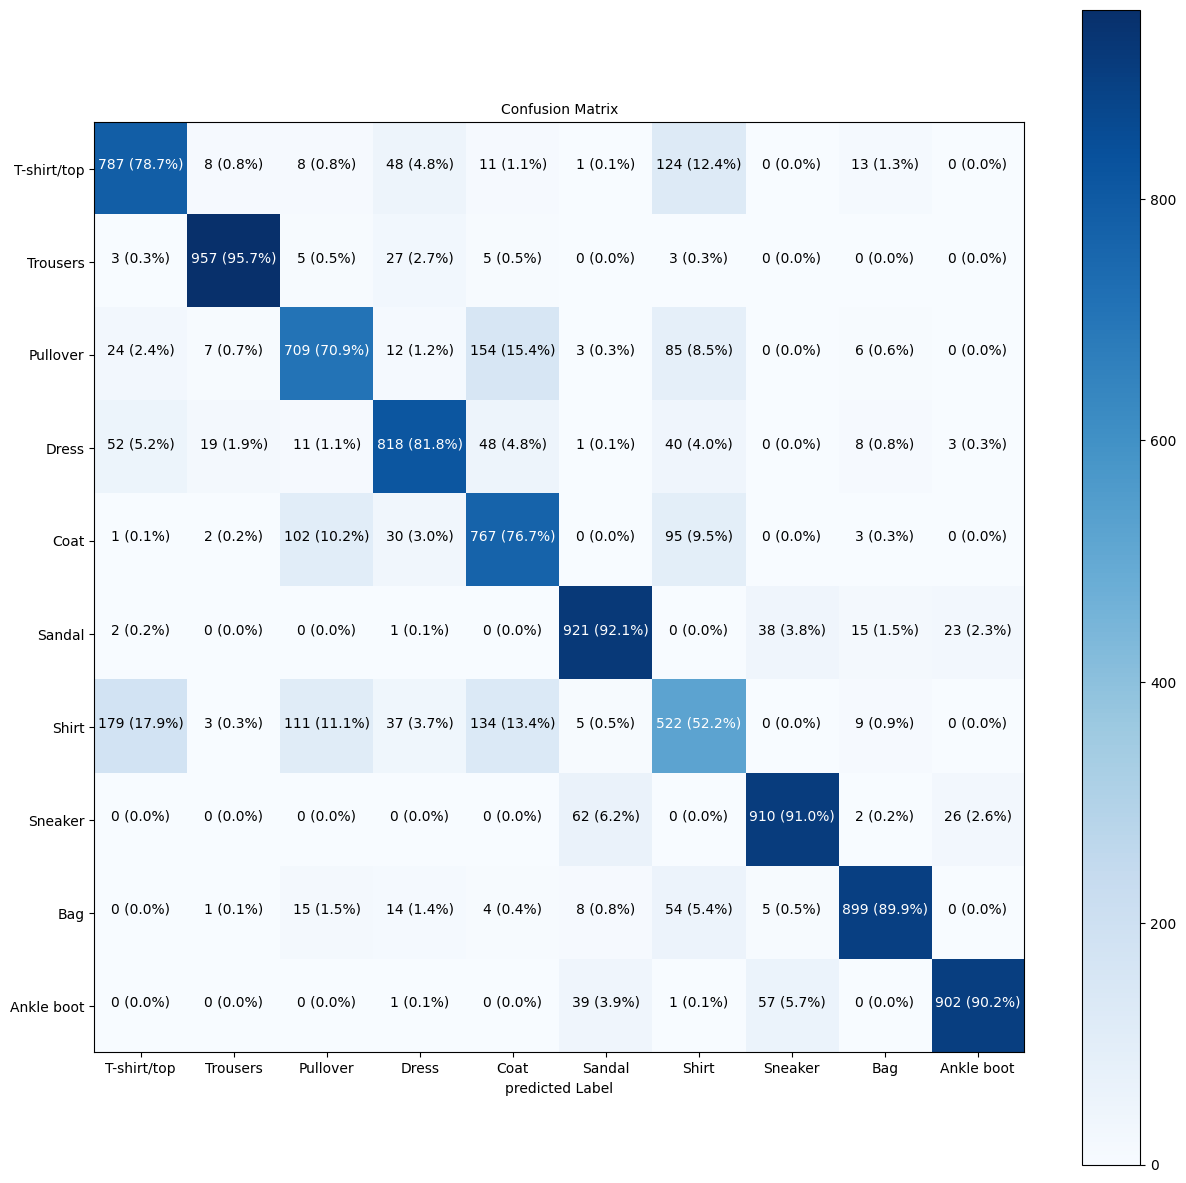

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

>🔑 **Note** : Often when working with images and other forms of visual data, it's good idea to viusalize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot woth truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  print(target_image.shape)
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # CHange the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"

  else:
    color = "red"

    # Add xlabel informatiion (prediction/ true label)
  plt.xlabel("Pred: {} {:0.2f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color ) # set the color to green or red based on if prediction is right or wrong

(28, 28)
1/1 [==============================] - 0s 42ms/step


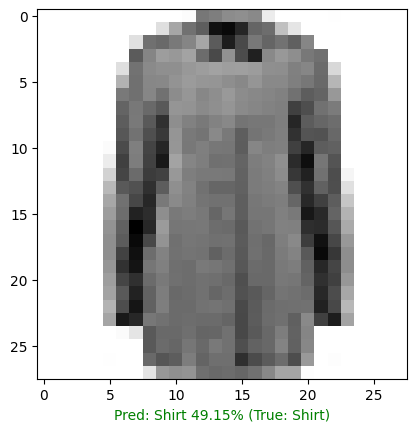

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, #always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

##What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of the layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes 
weights, weights.shape

(array([[ 0.45515072, -0.43327692,  0.49578577, -0.29461744],
        [-0.07147081, -0.37910104,  1.0240887 , -1.2221434 ],
        [-1.0617887 , -1.1751195 ,  0.6721857 ,  0.09043483],
        ...,
        [-0.0393794 ,  0.7689985 ,  0.4193751 , -0.12236611],
        [-0.15870535,  0.6238522 , -0.08299574, -0.31205758],
        [ 0.13463843,  0.03174544,  0.12948923, -0.6542904 ]],
       dtype=float32),
 (784, 4))

Now let's checkout bias vector

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([1.1008248, 2.1214342, 0.7731997, 1.2829143], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.
 
The bias vector get initialized as zeros (at least in the case of a TensorFlow dense layer).

The bias vector dictates how much the pattern within the corresponding weights matrix should influence the next layer. 

In [ ]:
model_14.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


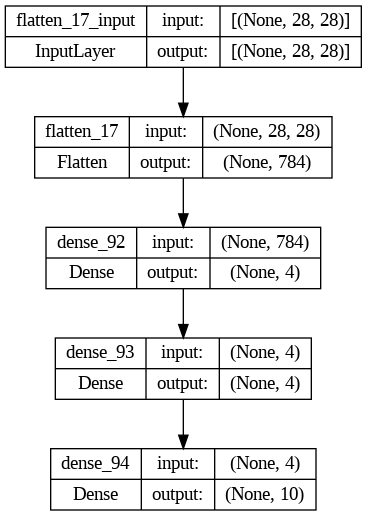

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

##Exercise

1. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

X = tf.random.normal(shape=[100])


In [ ]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 3.27468514e-01, -8.42625797e-01,  3.19433689e-01, -1.40755188e+00,
       -2.38805985e+00, -1.03924787e+00, -5.57323217e-01,  5.39707005e-01,
        1.69943225e+00,  2.88936555e-01, -1.50661159e+00, -2.64547437e-01,
       -5.97224057e-01, -1.91711318e+00, -6.20441437e-01,  8.50402296e-01,
       -4.06047940e-01, -3.02584124e+00,  9.05846417e-01,  2.98559874e-01,
       -2.25615546e-01, -7.61644304e-01, -1.89171398e+00, -9.38471198e-01,
        7.78522134e-01, -4.73388970e-01,  9.77726936e-01,  2.46944040e-01,
        2.05737472e-01, -5.25623322e-01,  3.24100167e-01,  2.54540909e-02,
       -1.06384970e-01, -6.36947513e-01,  1.16031218e+00,  2.50735909e-01,
       -4.17284966e-01,  4.01257783e-01, -1.41454422e+00, -5.93185663e-01,
       -1.66172135e+00,  3.35671932e-01,  1.08156286e-01,  2.34796807e-01,
       -5.66687644e-01, -3.58198434e-01,  8.86986256e-01,  5.27447701e-01,
        7.04022467e-01, -3.34212482e-01,  2.16396436

In [ ]:
import random
y = []
for i in range(100):
  y.append(random.randint(0,1))

y = tf.constant(y)
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)>

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit()